In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [4]:
data = pd.read_csv('data.csv')

In [5]:
print(len(data))

1658


In [14]:
data.head()

,Unnamed: 0,ordersid,customersid,auditdate,totaldefqty,totalamt,unit_price
0,0,BJ1004924073,13001527,2017-01-01,656.0,96356.18,146.884
1,1,BJ1004924086,13400327,2017-01-01,4560.0,694180.60,152.233
2,2,BJ1004924117,13005327,2017-01-01,1299.0,196480.20,151.255
3,3,BJ1004924262,13401521,2017-01-01,949.0,126786.74,133.6
4,4,BJ1004924268,13400722,2017-01-01,140.0,22651.64,161.797


In [9]:
for i in range(len(data)):
    data['unit_price'].iloc[i] = data['totalamt'].iloc[i] / data['totaldefqty'].iloc[i] 

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
data['unit_price'] = None

In [ ]:
data = data.drop(['unit-price'],axis=1)

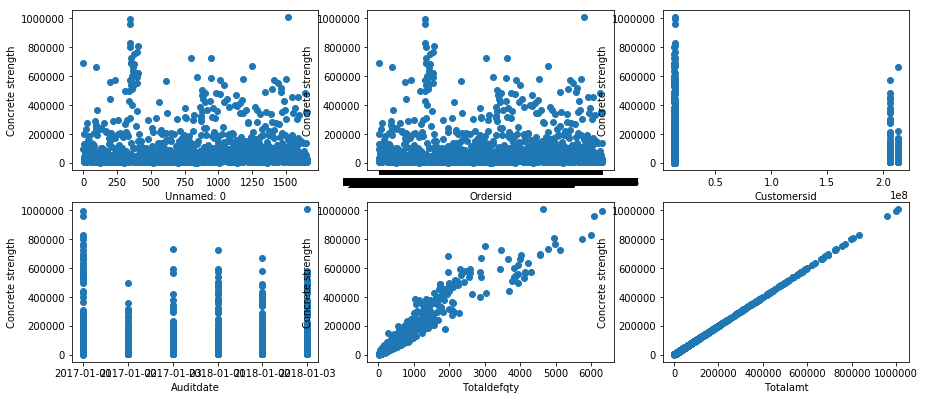

In [25]:
plt.figure(figsize=(15,10))
plot_count = 1
for feature in list(data.columns)[:-1]:
        plt.subplot(3,3,plot_count)
        plt.scatter(data[feature], data['totalamt'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Concrete strength')
        plot_count+=1

plt.show()

In [26]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [27]:
def split_train_test(data, feature, train_index=0.7):

    train, test = train_test_split(data, test_size = 1-train_index)

    if type(feature) == list:
        x_train = train[feature].as_matrix()
        y_train = train['totalamt'].as_matrix()

        x_test = test[feature].as_matrix()
        y_test = test['totalamt'].as_matrix()

    else:
        x_train = [[x] for x in list(train[feature])]
        y_train = [[x] for x in list(train['totalamt'])]

        x_test = [[x] for x in list(test[feature])]
        y_test = [[x] for x in list(test['totalamt'])]

    return x_train, y_train, x_test, y_test

totaldefqty 0.919923201124
unit_price 0.0500565527679


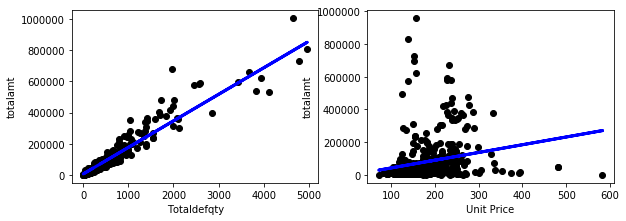

In [29]:
plt.figure(figsize=(15,7))
plot_count = 1

for feature in ['totaldefqty', 'unit_price']:
    data_tr = data[['totalamt', feature]]
    data_tr=data_tr[(data_tr.T != 0).all()]

    x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)

    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)

    # Plot outputs
    plt.subplot(2,3,plot_count)

    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue',
             linewidth=3)
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('totalamt')

    print(feature, r2_score(y_test, y_pred))

    plot_count+=1

plt.show()